# Heart Disease - Project by MD Rashadul Islam

Importing Necessary Library and Reading Data

In [1]:
import pandas as pd 
#For data manipulation and analysis.Provides data structures like DataFrames.
import matplotlib.pyplot as plt
#for creating static, animated, and interactive visualizations.
import seaborn as sns
#based on Matplotlib, for creating informative and attractive statistical graphics.
from imblearn.under_sampling import RandomUnderSampler
#for addressing class imbalance problems by undersampling the majority class.
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#for building ensemble models,combines the predictions of multiple base classifiers.
from imblearn.ensemble import BalancedRandomForestClassifier
#for building ensemble models,combines the predictions of multiple base classifiers, designed for imbalanced datasets.
from sklearn.neighbors import KNeighborsClassifier
#classifies data points based on the majority class among their k-nearest neighbors.
from sklearn.linear_model import LogisticRegression
#for binary and multi-class classification tasks.
from sklearn.svm import SVC
#Support Vector Machine (SVM) classifier for both classification and regression tasks.
from xgboost import XGBClassifier
#Gradient boosting library for classification tasks.
from sklearn.tree import DecisionTreeClassifier
#A non-linear model that partitions the data into subsets based on feature values.
from sklearn.neural_network import MLPClassifier
#Multi-Layer Perceptron (MLP) classifier, which is a type of artificial neural network used for classification tasks.
from sklearn.metrics import classification_report
#A utility function to generate a classification report
from sklearn.model_selection import train_test_split
#A function for splitting your dataset into training and testing subsets

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Heart Disease.csv')

In [3]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Class Count

In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        class_counts = df[col].value_counts()
        print(f"Class counts for column '{col}':\n{class_counts}\n")

Class counts for column 'HeartDisease':
No     292422
Yes     27373
Name: HeartDisease, dtype: int64

Class counts for column 'Smoking':
No     187887
Yes    131908
Name: Smoking, dtype: int64

Class counts for column 'AlcoholDrinking':
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

Class counts for column 'Stroke':
No     307726
Yes     12069
Name: Stroke, dtype: int64

Class counts for column 'DiffWalking':
No     275385
Yes     44410
Name: DiffWalking, dtype: int64

Class counts for column 'Sex':
Female    167805
Male      151990
Name: Sex, dtype: int64

Class counts for column 'AgeCategory':
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

Class counts for column 'Race':
White                             245212


Data Visualisation

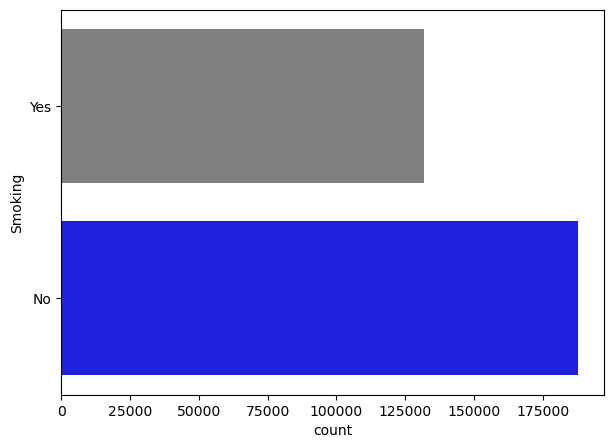

In [6]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,y="Smoking",palette=["grey","blue"])
plt.show()

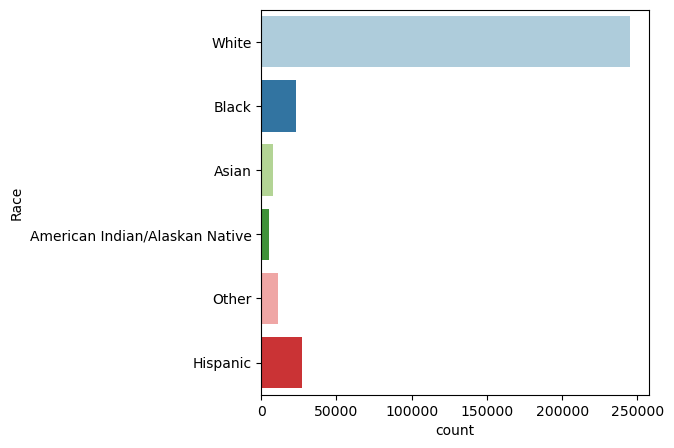

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,y="Race",palette="Paired")
plt.show()

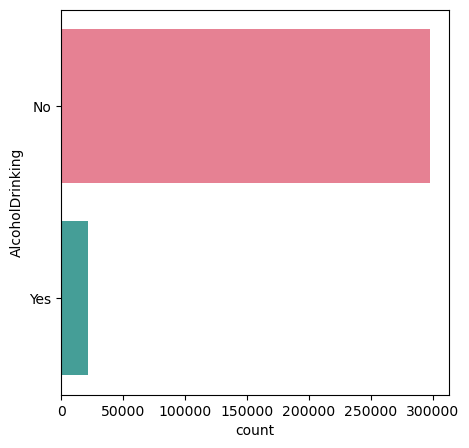

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,y="AlcoholDrinking",palette="husl")
plt.show()

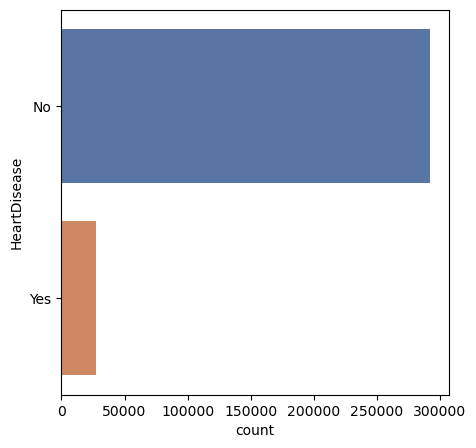

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,y="HeartDisease",palette="deep")
plt.show()

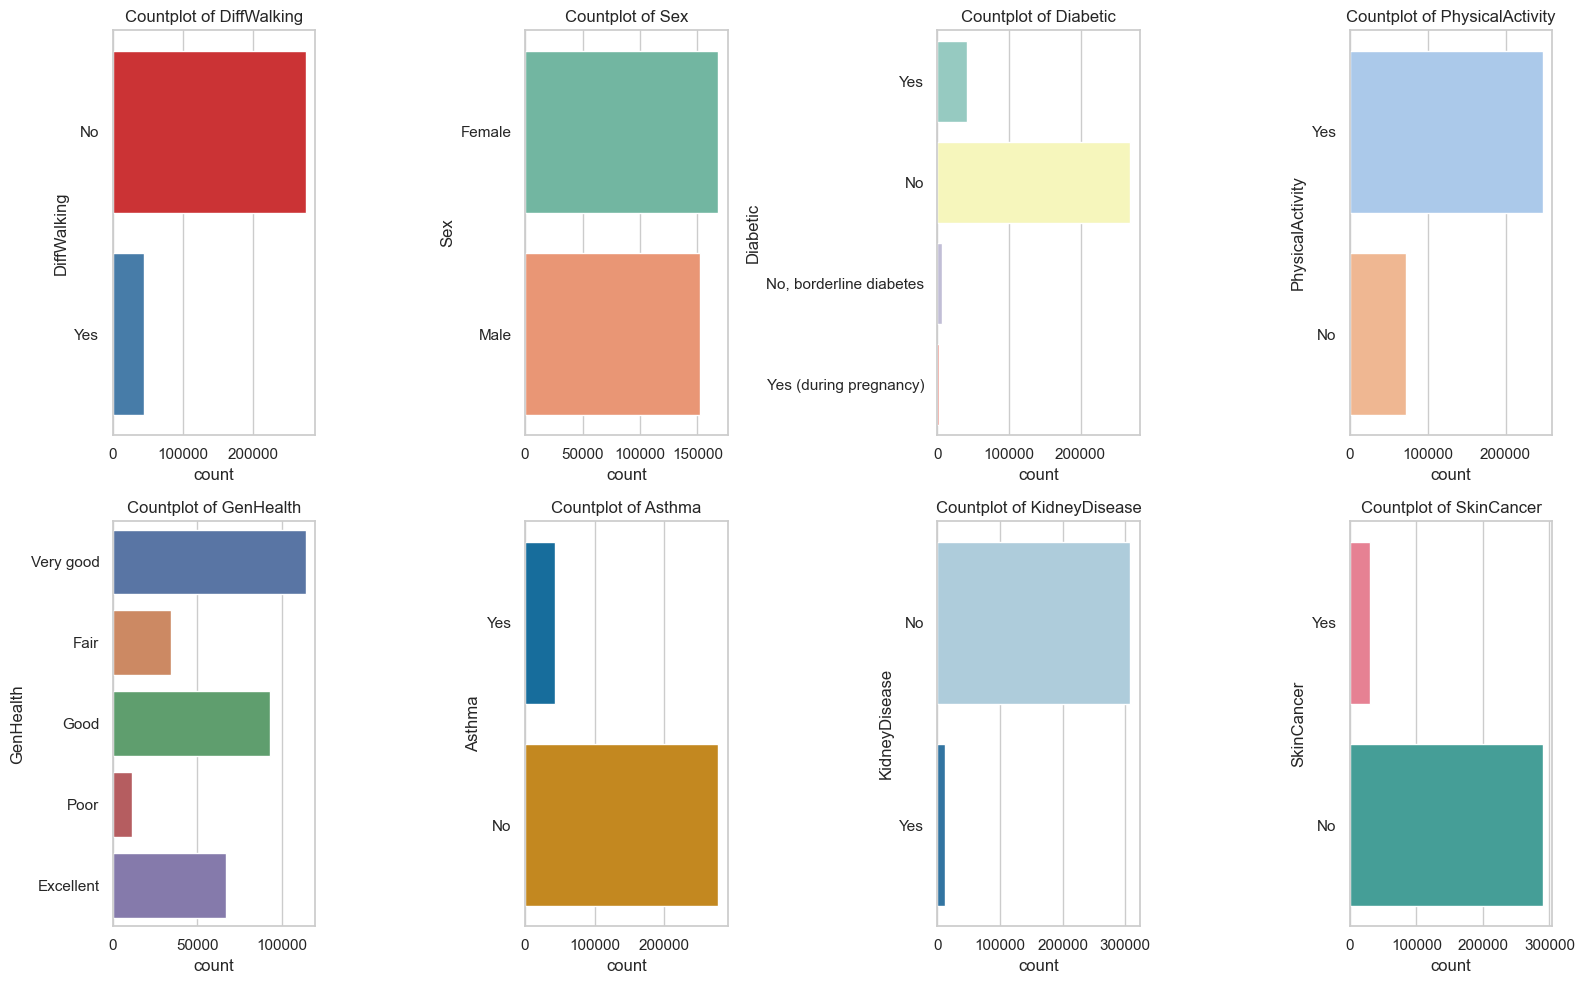

In [10]:
columns = ['DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity',
           'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
palettes = ['Set1', 'Set2', 'Set3', 'pastel', 'deep', 'colorblind', 'Paired', 'husl']

sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))

axes = axes.flatten()
for i, (col, palette) in enumerate(zip(columns, palettes)):
    sns.countplot(y=col, data=df, ax=axes[i], palette=palette)
    axes[i].set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()

Cleaning and Transformation

In [11]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()

categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'AgeCategory', 'Race'], drop_first=True)

# Convert 'HeartDisease' column to binary (1: Yes, 0: No)
df['HeartDisease'] = df['HeartDisease'].apply(lambda x: 1 if x == 'Yes' else 0)

# Check for missing values and handle them if necessary
print(df.isnull().sum())

# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

HeartDisease               0
BMI                        0
Smoking                    0
AlcoholDrinking            0
Stroke                     0
PhysicalHealth             0
MentalHealth               0
DiffWalking                0
Diabetic                   0
PhysicalActivity           0
GenHealth                  0
SleepTime                  0
Asthma                     0
KidneyDisease              0
SkinCancer                 0
Sex_Male                   0
AgeCategory_25-29          0
AgeCategory_30-34          0
AgeCategory_35-39          0
AgeCategory_40-44          0
AgeCategory_45-49          0
AgeCategory_50-54          0
AgeCategory_55-59          0
AgeCategory_60-64          0
AgeCategory_65-69          0
AgeCategory_70-74          0
AgeCategory_75-79          0
AgeCategory_80 or older    0
Race_Asian                 0
Race_Black                 0
Race_Hispanic              0
Race_Other                 0
Race_White                 0
dtype: int64


Class Balancing

In [12]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target variable
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Apply random undersampling to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

Feature Importance

In a Random Forest model, feature importance values are calculated based on how much each feature contributes to reducing the impurity (e.g., Gini impurity or entropy) when making decisions in the decision trees that make up the ensemble. A higher feature importance score suggests that the feature is more influential in making predictions.


In [13]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Display feature importances for each feature
for feature_name, importance in zip(X.columns, feature_importances):
    print(f"{feature_name}: {importance}")

BMI: 0.24998687657774185
Smoking: 0.02580079369880715
AlcoholDrinking: 0.010115646820653376
Stroke: 0.03172207341610943
PhysicalHealth: 0.07062566568725773
MentalHealth: 0.05703398662716758
DiffWalking: 0.045803668267112796
Diabetic: 0.04578144136554184
PhysicalActivity: 0.021788629648701555
GenHealth: 0.08258191623639496
SleepTime: 0.08835591082241832
Asthma: 0.017983394885969166
KidneyDisease: 0.01569603185583427
SkinCancer: 0.016455363436270805
Sex_Male: 0.027386041440083116
AgeCategory_25-29: 0.008261480150986107
AgeCategory_30-34: 0.008481492140481467
AgeCategory_35-39: 0.009492024831500849
AgeCategory_40-44: 0.008019195675318277
AgeCategory_45-49: 0.007288708173907364
AgeCategory_50-54: 0.00765167145469494
AgeCategory_55-59: 0.00899632768447815
AgeCategory_60-64: 0.011764394507596053
AgeCategory_65-69: 0.014496384222314803
AgeCategory_70-74: 0.020000565514930204
AgeCategory_75-79: 0.020701378315599105
AgeCategory_80 or older: 0.03198227318507571
Race_Asian: 0.0029420973449941147


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Balanced Random Forest': BalancedRandomForestClassifier(n_estimators=100, random_state=42),
    'ANN': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = clf.score(X_test, y_test)
    report = classification_report(y_test, y_pred)

    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}\n{'='*50}\n") 
    
    
    # 0: No Heart Disease, 1: Heart Disease

Classifier: Logistic Regression
Accuracy: 0.7542
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5434
           1       0.75      0.77      0.76      5516

    accuracy                           0.75     10950
   macro avg       0.75      0.75      0.75     10950
weighted avg       0.75      0.75      0.75     10950


Classifier: SVM
Accuracy: 0.7602
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      5434
           1       0.74      0.82      0.77      5516

    accuracy                           0.76     10950
   macro avg       0.76      0.76      0.76     10950
weighted avg       0.76      0.76      0.76     10950


Classifier: k-Nearest Neighbors
Accuracy: 0.7274
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      5434
           1       0.73      0.73  

*  Precision measures how many of the predicted positive instances were actually positive.
*  Recall measures how many of the actual positive instances were correctly predicted
*  The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. Higher F1-scores indicate better model performance.
*  The support represents the number of instances in each class in your dataset.
*  Accuracy is the ratio of correctly predicted instances to the total number of instances.
*  Macro-averaging calculates the metric independently for each class and then takes the average. It gives equal weight to each class.
*  Weighted averaging also calculates the metric for each class, but it gives more weight to classes with larger support.

Comparison Between models

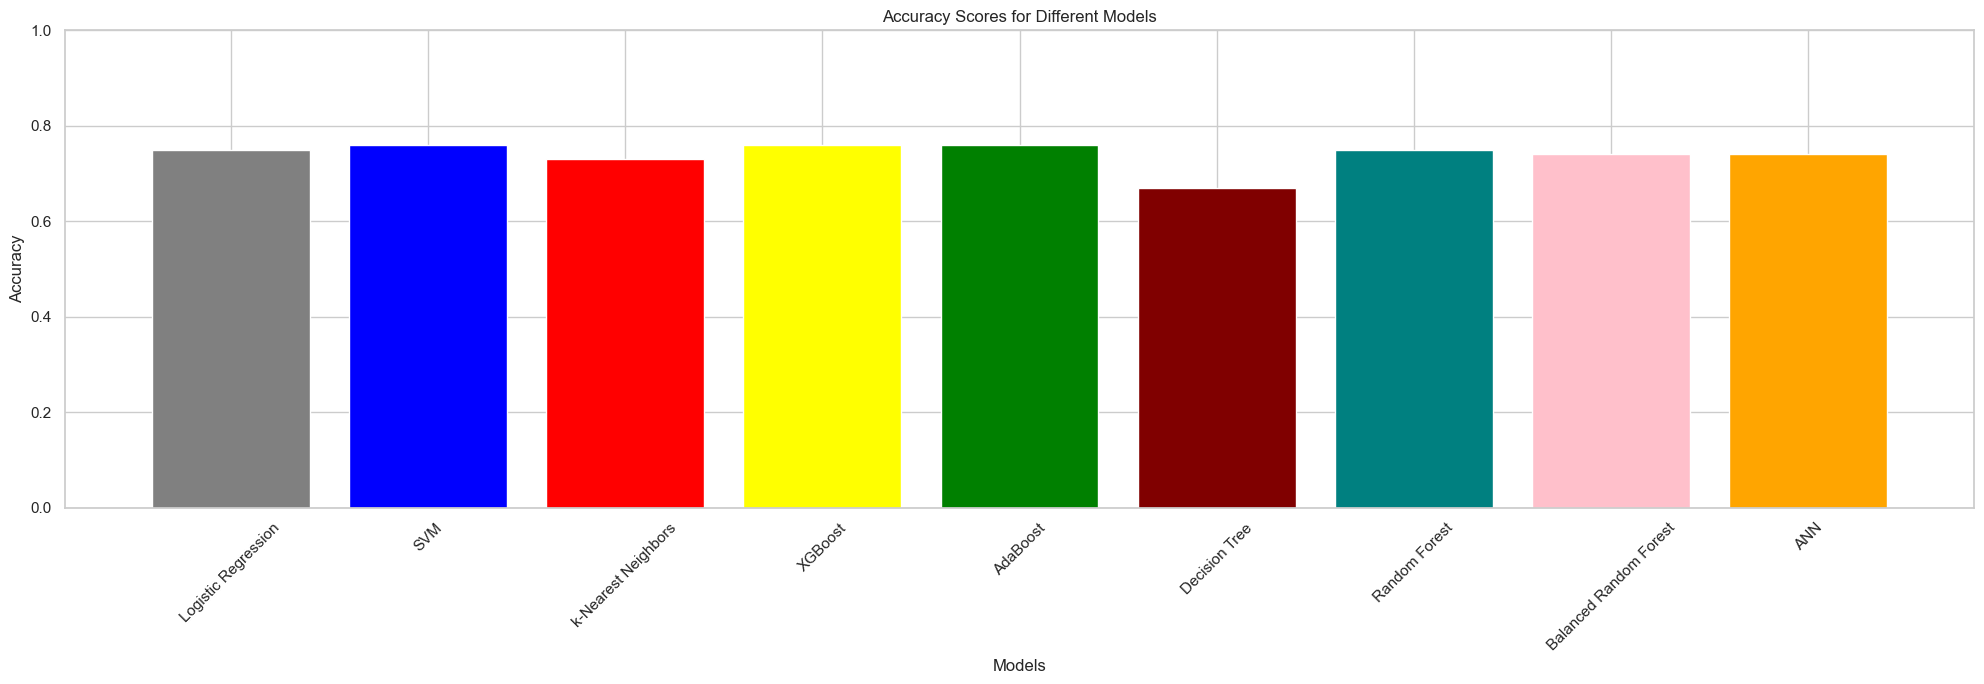

In [15]:
models = ['Logistic Regression', 'SVM', 'k-Nearest Neighbors', 'XGBoost', 'AdaBoost', 'Decision Tree', 'Random Forest', 'Balanced Random Forest', 'ANN']
accuracy_scores = [0.75, 0.76, 0.73, 0.76, 0.76, 0.67, 0.75, 0.74, 0.74]  

plt.figure(figsize=(20, 7))
plt.bar(models, accuracy_scores, color=['grey', 'blue', 'red', 'yellow', 'green', 'maroon', 'teal', 'pink', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()